# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-21 14:22:05.333216: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 14:22:05.362301: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 14:22:05.824404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [4]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/10


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-21 14:22:06.865322: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-21 14:22:06.865342: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: faical-ubuntu
2024-05-21 14:22:06.865345: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: faical-ubuntu
2024-05-21 14:22:06.865476: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.171.4
2024-05-21 14:22:06.865486: I external/local_xla/xla/stre

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6776 - loss: 0.6058 - val_accuracy: 0.8358 - val_loss: 0.3929
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.8974 - loss: 0.2927 - val_accuracy: 0.9508 - val_loss: 0.1586
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9640 - loss: 0.1321 - val_accuracy: 0.9517 - val_loss: 0.1197
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.9743 - loss: 0.0888 - val_accuracy: 0.9725 - val_loss: 0.0890
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.9800 - loss: 0.0804 - val_accuracy: 0.9683 - val_loss: 0.0896
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.9813 - loss: 0.0662 - val_accuracy: 0.9792 - val_loss: 0.0746
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9834 - loss: 0.0754 - val_accuracy: 0.9783 - val_loss: 0.0729
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9839 - loss: 0.0647 - val_accuracy:

2024/05/21 14:22:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.9886 - loss: 0.0431


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CONCURRENCE' already exists. Creating a new version of this model...
2024/05/21 14:22:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 18
Created version '18' of model 'QuantumStateClassifier-CONCURRENCE'.


Model saved in run a8399712141e4ca2b3aa0f773bcfcb51


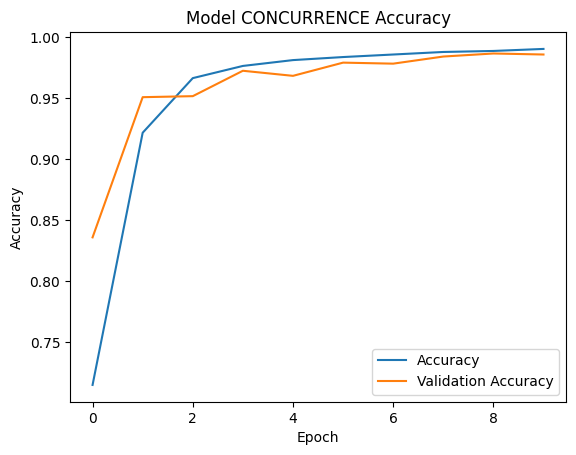

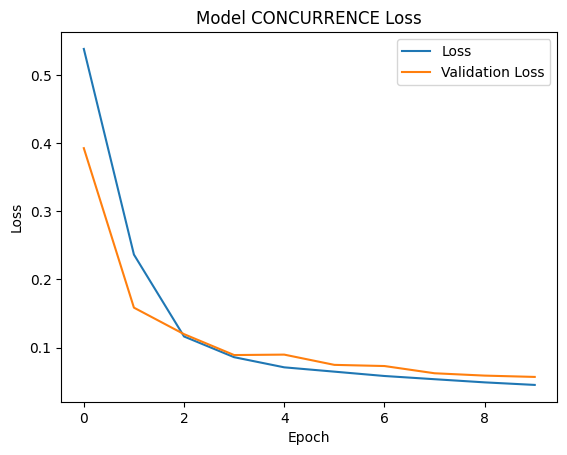

Epoch 1/10


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.6683 - loss: 0.6077 - val_accuracy: 0.8700 - val_loss: 0.3517
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9177 - loss: 0.2631 - val_accuracy: 0.9550 - val_loss: 0.1333
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.9704 - loss: 0.1073 - val_accuracy: 0.9742 - val_loss: 0.0800
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9821 - loss: 0.0609 - val_accuracy: 0.9817 - val_loss: 0.0582
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.9825 - loss: 0.0495 - val_accuracy: 0.9842 - val_loss: 0.0470
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.9912 - loss: 0.0282 - val_accuracy: 0.9842 - val_loss: 0.0415
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.9925 - val_loss: 0.0345
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9928 - loss: 0.0234 - val_accurac

2024/05/21 14:22:12 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9926 - loss: 0.0227


Registered model 'QuantumStateClassifier-ENTROPY' already exists. Creating a new version of this model...
2024/05/21 14:22:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 15


Model saved in run fa4ae0386eca4e40bcf1a0b8c60b9711


Created version '15' of model 'QuantumStateClassifier-ENTROPY'.


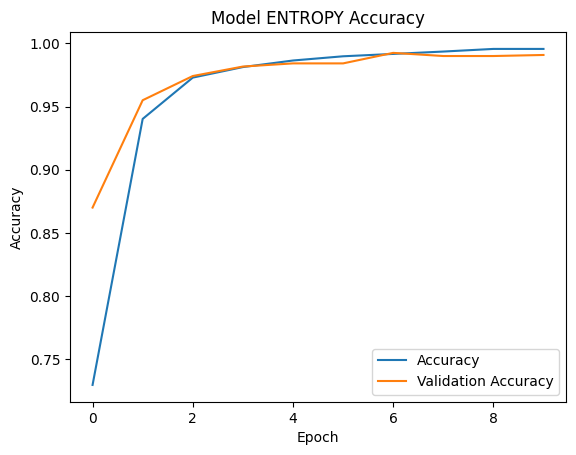

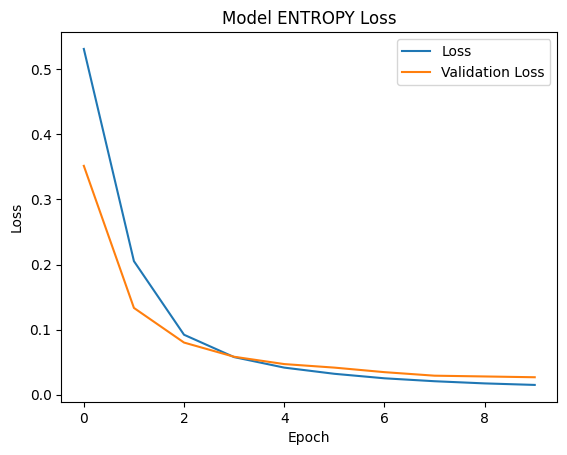

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6736 - loss: 0.6117 - val_accuracy: 0.8567 - val_loss: 0.4172
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8926 - loss: 0.3266 - val_accuracy: 0.9492 - val_loss: 0.1506
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9637 - loss: 0.1221 - val_accuracy: 0.9683 - val_loss: 0.0849
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.9835 - loss: 0.0635 - val_accuracy: 0.9758 - val_loss: 0.0641
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9876 - loss: 0.0455 - val_accuracy: 0.9917 - val_loss: 0.0507
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9894 - loss: 0.0384 - val_accuracy: 0.9858 - val_loss: 0.0392
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9904 - loss: 0.0319 - val_accuracy: 0.9900 - val_loss: 0.0343
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.9923 - loss: 0.0246 - va

2024/05/21 14:22:16 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9932 - loss: 0.0196


Registered model 'QuantumStateClassifier-NEGATIVITY' already exists. Creating a new version of this model...
2024/05/21 14:22:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 15


Model saved in run 76e567237c7c4ffe8b2175cf5651e429


Created version '15' of model 'QuantumStateClassifier-NEGATIVITY'.


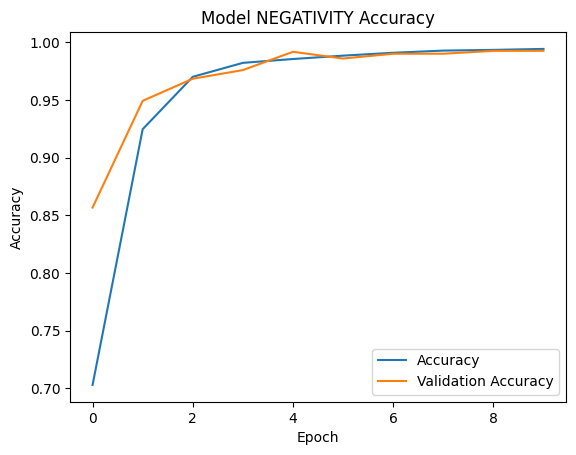

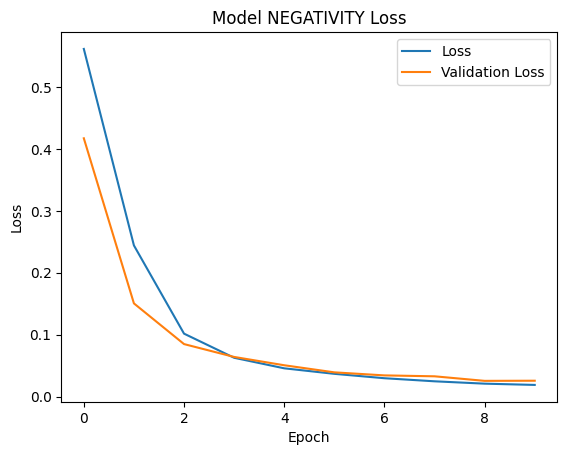

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7199 - loss: 0.5793 - val_accuracy: 0.7433 - val_loss: 0.4917
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.7688 - loss: 0.4434 - val_accuracy: 0.8292 - val_loss: 0.3798
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.8573 - loss: 0.3274 - val_accuracy: 0.8575 - val_loss: 0.2971
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.8920 - loss: 0.2570 - val_accuracy: 0.9242 - val_loss: 0.2331
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9231 - loss: 0.2050 - val_accuracy: 0.9017 - val_loss: 0.2059
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9433 - loss: 0.1625 - val_accuracy: 0.9258 - val_loss: 0.1648
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9541 - loss: 0.1354 - val_accuracy: 0.9592 - val_loss: 0.1294
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.9656 - loss: 0.1128 - va

2024/05/21 14:22:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.9610 - loss: 0.0961


Registered model 'QuantumStateClassifier-CHSH' already exists. Creating a new version of this model...
2024/05/21 14:22:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 35


Model saved in run 3ceb61da7a1a4dc1874d6589ab12700c


Created version '35' of model 'QuantumStateClassifier-CHSH'.


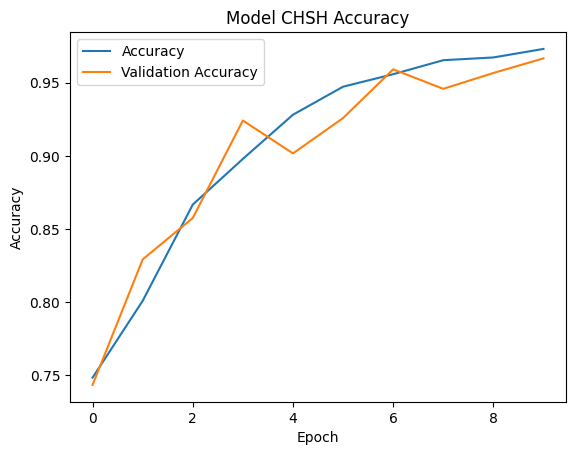

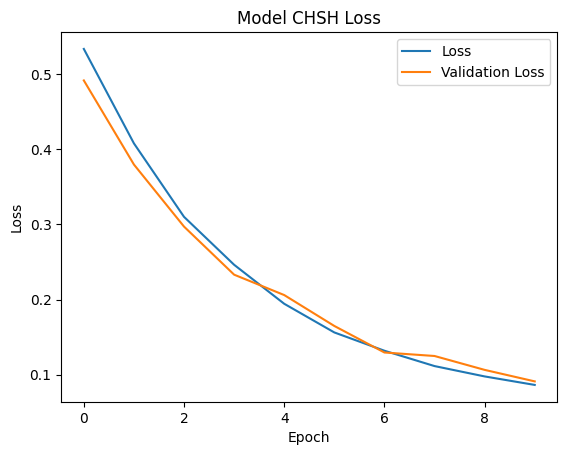

In [5]:
models = {}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
